<a href="https://colab.research.google.com/github/thejeshreddymarripati/LinkedIn-Job-Salary-Prediction/blob/main/Group_9_Bi_directional_elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Another variable selection using Bi-directional elimination as a wrapper method

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the cleaned dataset using pandas library

In [ ]:
df = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
df

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
0,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
1,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
2,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
3,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
4,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
14339,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
14340,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
14341,MRI Manager,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


## FInding the statistical values of the dataset

In [ ]:
df.describe()

,salary,pay_period,work_type,experience_level,sponsored,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
count,1.434300e+04,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,8.858367e+04,2.015687,1.125009,3.615631,0.293802,4.913547,0.309768,0.644286,0.045946
std,5.323768e+04,0.463526,0.891822,1.784866,0.455518,2.033035,0.462414,0.478746,0.209375
min,1.150000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.833622e+04,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,8.833622e+04,2.000000,1.000000,5.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,8.833622e+04,2.000000,1.000000,5.000000,1.000000,7.000000,1.000000,1.000000,0.000000
max,1.100000e+06,3.000000,6.000000,5.000000,1.000000,7.000000,1.000000,1.000000,1.000000


## Declaring the target variable as y and the independent variables in X

In [ ]:
X = df.drop(['salary','job_title','location','skills','currency','company_name'], axis=1)
y = df['salary']

In [ ]:
X

,pay_period,work_type,experience_level,sponsored,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
0,2,1,5,0,1.0,1,0,0
1,3,0,5,0,1.0,1,0,0
2,2,1,5,1,1.0,1,0,0
3,2,1,5,1,2.0,1,0,0
4,2,1,5,0,2.0,0,1,0
...,...,...,...,...,...,...,...,...
14338,1,4,2,0,5.0,0,1,0
14339,2,1,2,0,5.0,0,1,0
14340,1,4,2,0,5.0,0,1,0
14341,2,1,5,0,7.0,0,1,0


In [ ]:
y

0         88336.222112
1         88336.222112
2         88336.222112
3         42000.000000
4         88336.222112
             ...      
14338     88336.222112
14339     88336.222112
14340     88336.222112
14341    135000.000000
14342     88336.222112
Name: salary, Length: 14343, dtype: float64

## Getting the dimmensions of X and y using shape

In [ ]:
X.shape

(14343, 8)

In [ ]:
y.shape

(14343,)

## Splitting the data into two parts train and test using sklearns train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Dimensions of  the splitted datasets

In [ ]:
X_train.shape

(11474, 8)

In [ ]:
X_test.shape

(2869, 8)

## Scaling the data set using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

## Now, lets initialize the best model from the step 1 and step 3 which is RandomForestRegressor

## Importing the RandomForestRegressor from sklearn library and setting the best hyperparameter values obtained from step 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
best_model = RandomForestRegressor(bootstrap = True, max_depth = 20, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 50, random_state=42)


## Training the model which is called fitting

In [ ]:
best_model.fit(X_train, y_train)

<ipython-input-17-180deabc21e6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

## Evaluating the performance of the model using Mean Squared Error (MSE) and R^2 Score before selectinf features

In [ ]:
from sklearn.metrics import mean_squared_error
mse_bm_before = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error without selected features: {mse_bm_before}")

Mean Squared Error without selected features: 0.7232365683045799


In [ ]:
from sklearn.metrics import r2_score
r2_bm_before = r2_score(y_test, y_pred)
print("R^2 Score without selected features:",r2_bm_before)

R^2 Score without selected features: 0.0995113974754196


## So now, lets perform Bi-directional elimination as a wrapper method using forward eliminatio. Here we used RFE, Recursive Feature Elimination. It is a feature selection technique commonly used in machine learning to select the most important features for a given model

In [ ]:
y_train_flat = y_train.ravel()

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(best_model, n_features_to_select=2)
selector = selector.fit(X_train, y_train_flat)

## Getting selected feature indices

In [ ]:
selected_features = selector.support_

In [ ]:
selected_features

array([False,  True,  True, False, False, False, False, False])

## From the above cell the True represents that the respective feature is selected and False represents that those features are not selected

In [ ]:
X.columns

Index(['pay_period', 'work_type', 'experience_level', 'sponsored',
       'company_size', 'category_ComplexOnsiteApply', 'category_OffsiteApply',
       'category_SimpleOnsiteApply'],
      dtype='object')

## So, from the above two cells we can conclude that using RFE forward elimination the selected features are "work_type" and "experience_level"

## So we can say that another variable selected is "work_type" because "experience_level" variable is already selected.

## Note: we can also go for more than 2 features selection also

## Now lets update the X_train and X_test with selected features

In [ ]:
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

## Now, Lets Train and Evaluate the Model with Selected Features

In [ ]:
best_model.fit(X_train_selected, y_train_flat)
y_pred = best_model.predict(X_test_selected)

## Evaluating the performance of the model using Mean Squared Error (MSE) and R^2 Score after selectinf features

In [ ]:
from sklearn.metrics import mean_squared_error
mse_bm_after = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with selected features: {mse_bm_after}")

Mean Squared Error with selected features: 0.7204295656690304


In [ ]:
from sklearn.metrics import r2_score
r2_bm_after = r2_score(y_test, y_pred)
print("R^2 Score with selected features:",r2_bm_after)

R^2 Score with selected features: 0.10300634503662243


## Now lets find the ranking of all the features based on the RFE elimination

In [ ]:
ranking = selector.ranking_
features = X.columns
feature_ranking = list(zip(features, ranking))
feature_ranking.sort(key=lambda x: x[1],reverse=True)

## Lets plot the ranks for better understanding

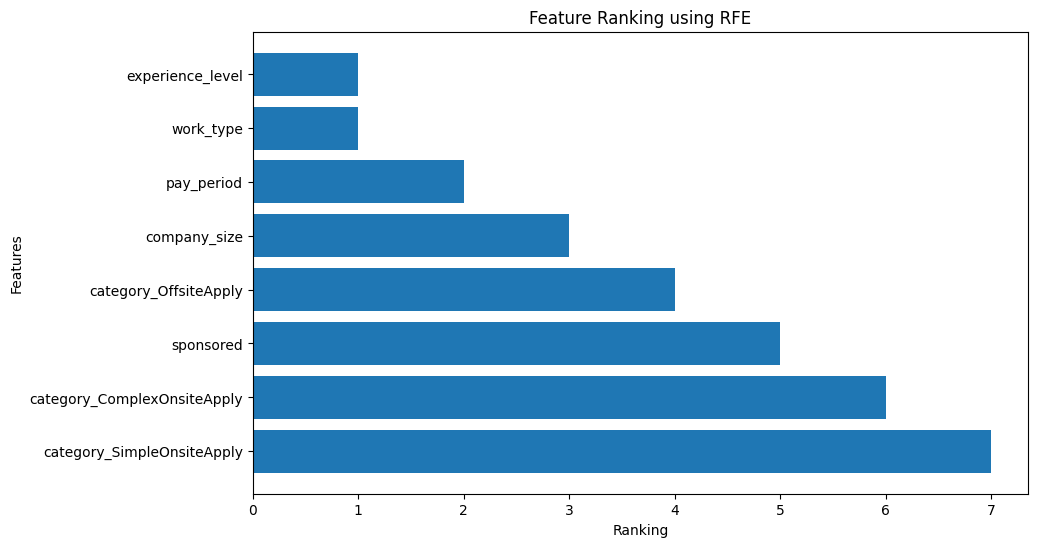

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_ranking)), [rank for _, rank in feature_ranking], align="center")
plt.yticks(range(len(feature_ranking)), [feature for feature, _ in feature_ranking])
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking using RFE')
plt.show()

## From the above plot you can se the sorted order of the feature selection based on the RFE elimination. Here, "experience_level" and "work_type" are ranked first followed by "pay_period" at 2nd, "company_size" at 3rd and so on..

## Dataframe of selected features for the first 10 samples

In [ ]:
selected_features_df = X_train.iloc[:10, selected_features]

## Creating the Heat map

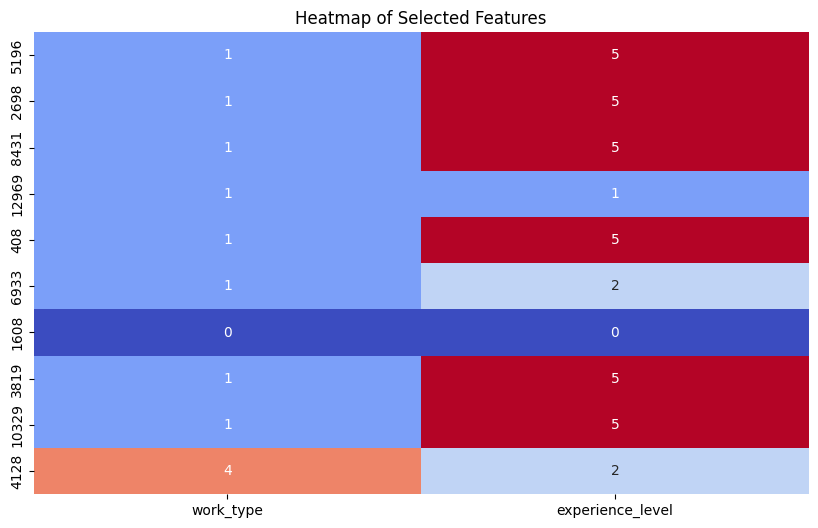

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(selected_features_df, cmap='coolwarm', cbar=False, annot=True)
plt.title('Heatmap of Selected Features')
plt.show()

## From the above heat map we can observe that though the experience_level variable has high chance of selection the work_type variable shows significant selction chance too.

## Evaluation metric plots

## Plotting the evaluation metrics using plt library

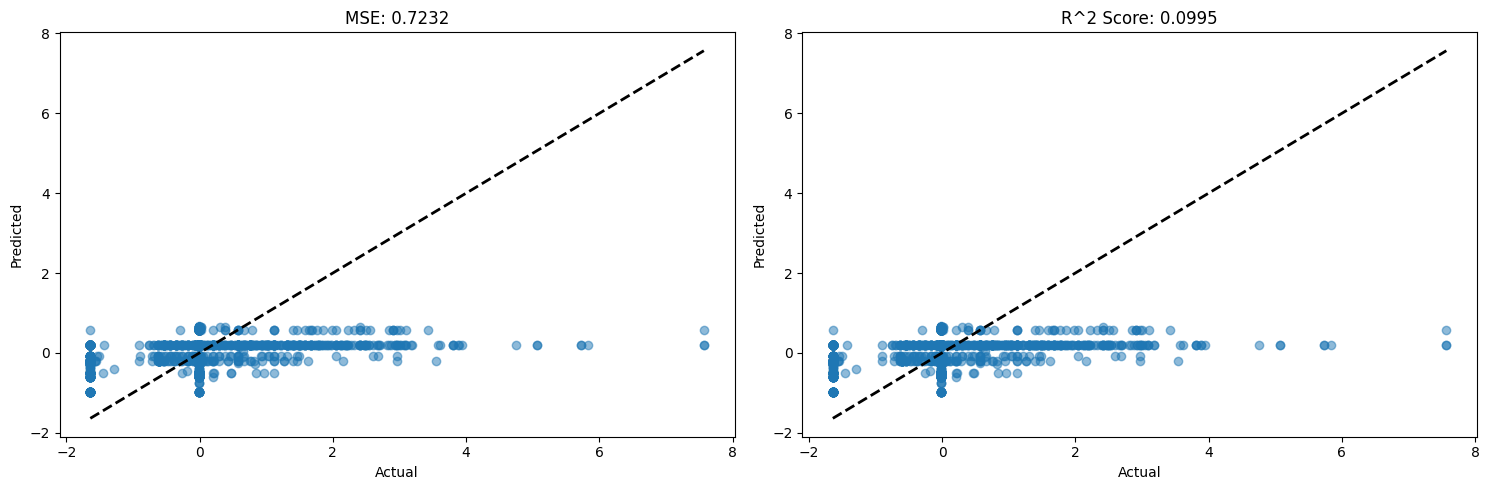

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_bm_before:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_bm_before:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

## Barplot of MSE values before and after the features selection

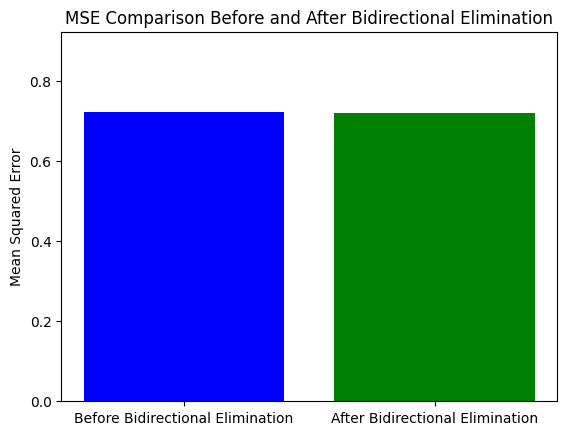

In [ ]:
# Data for the bar chart
categories = ['Before Bidirectional Elimination', 'After Bidirectional Elimination']
mse_values = [mse_bm_before, mse_bm_after]

# Plotting the bar chart
plt.bar(categories, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison Before and After Bidirectional Elimination')
plt.ylim(0, max(mse_values) + 0.2)
plt.show()

## From the above bar plot we can see that there is no significant drop in the evaluation measures before and after the bidirectional elimination, this is because the selected feature is same before and after the bi-directional elimination. But adding another feature to the model we can observe from the MSE values that there is a little drop of the value from 0.7232 to 0.7204

## From the above visualizations, the experience_level variable is dominating the other variable. It is evident that the metrics are not that changed or dropped because of the domination of experience_level variable over other variables